In [1]:
CSV_PATH = "/home/zhimin90/DePaul/CSC695/Github/CSC695-Masters-Research-on-Neural-Network-Time-Series-Attention-Models/Asset/"

In [19]:
import pickle
import pandas as pd
import numpy as np
from datetime import timedelta, date
from dateutil.relativedelta import relativedelta

In [3]:
results_df = pickle.load(open(CSV_PATH  + 'results_df.pickle', 'rb'))

In [7]:
results_df = results_df.iloc[0:1000000]

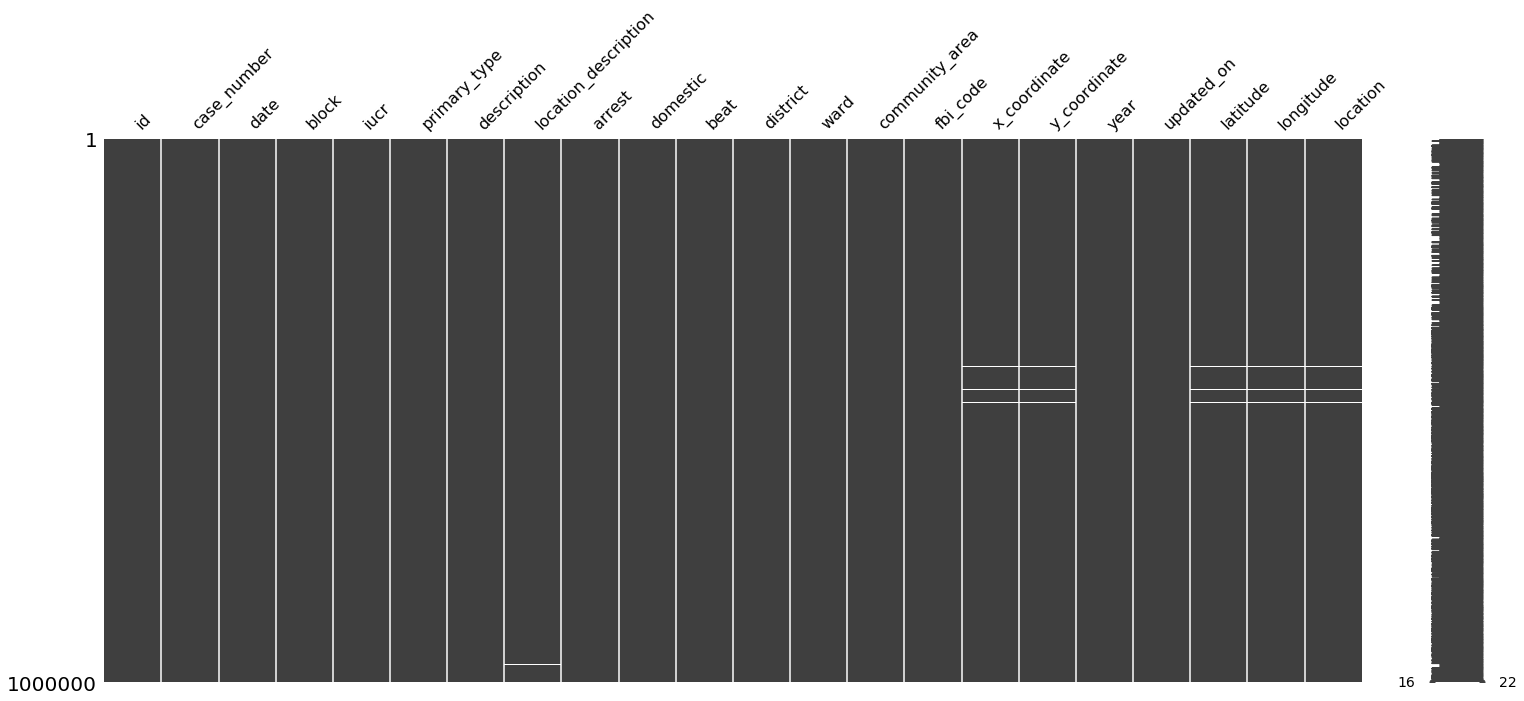

In [8]:
#plot missing variables list
import matplotlib.pyplot as plt
import missingno as msno
msno.matrix(results_df)
plt.show()

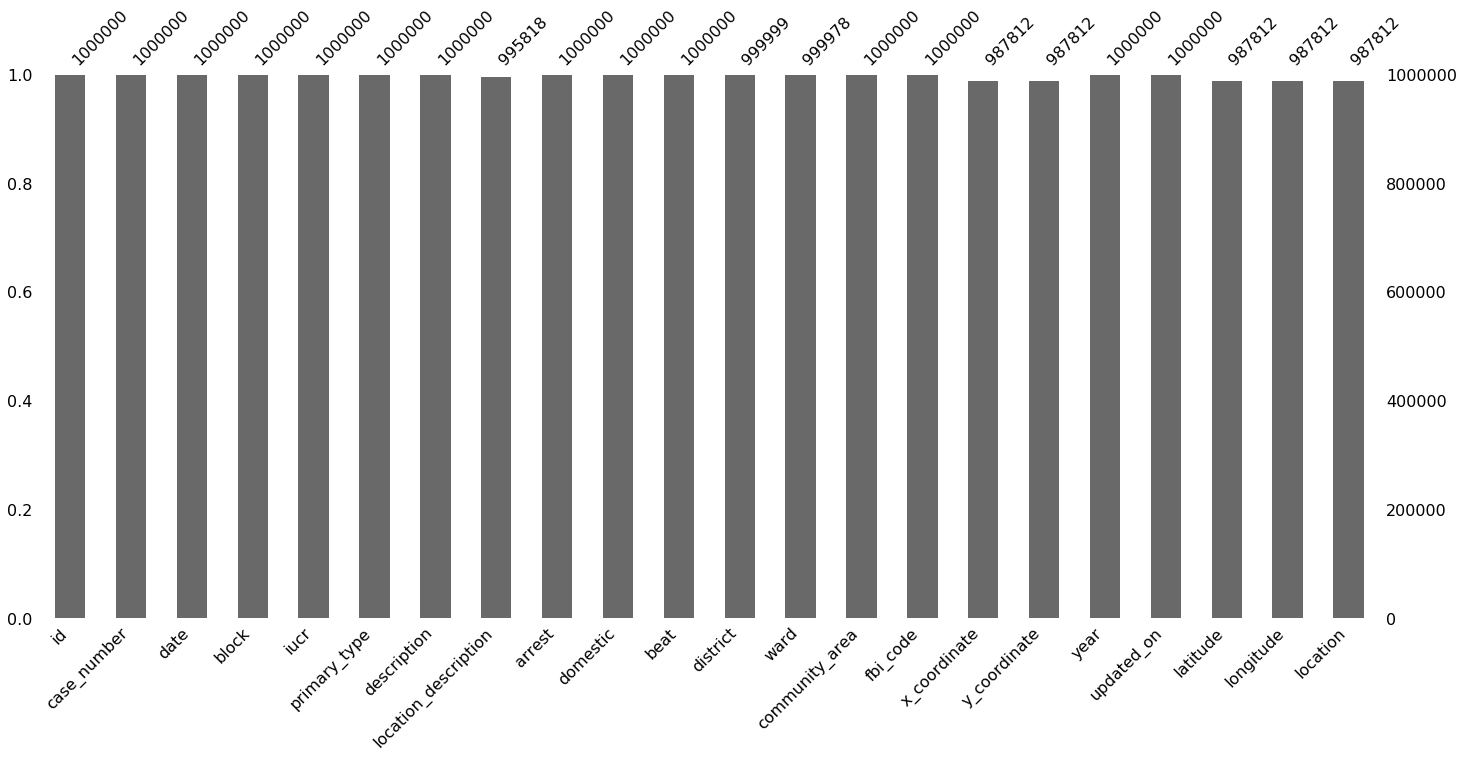

In [9]:
msno.bar(results_df) 

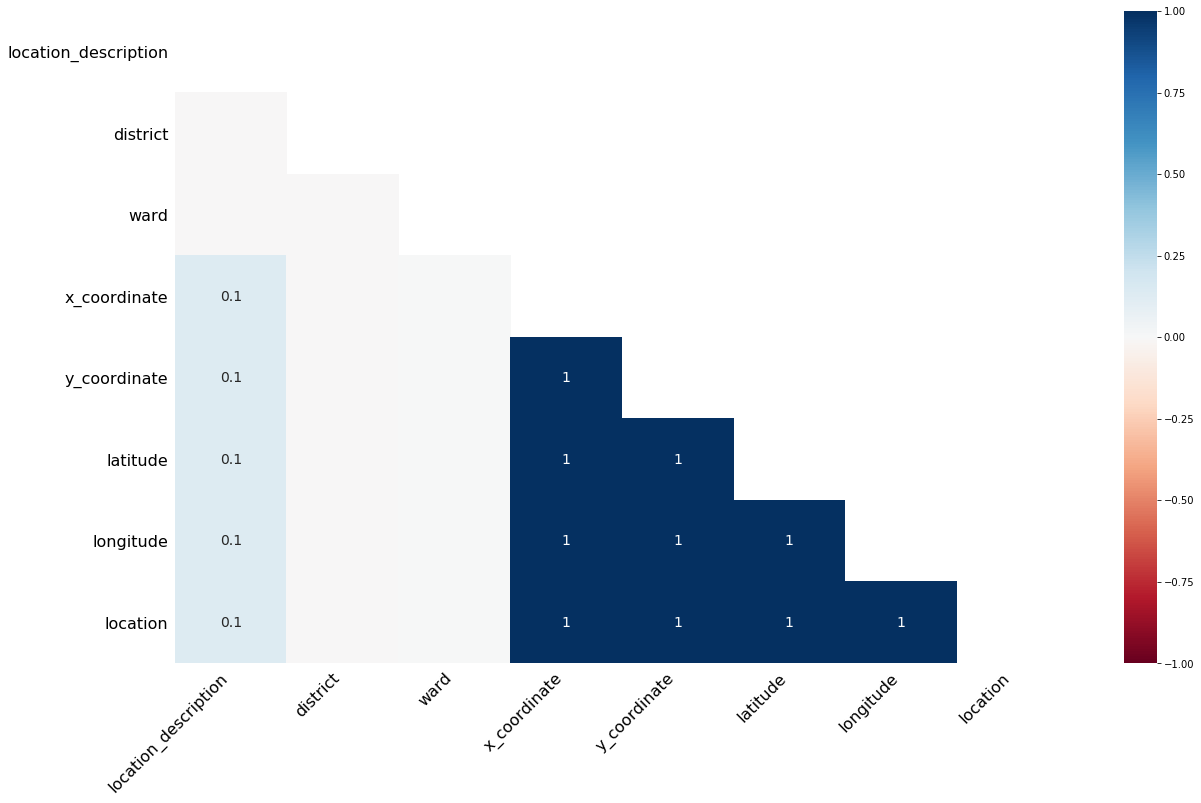

In [10]:
msno.heatmap(results_df) 

In [11]:
results_df.primary_type.value_counts()

THEFT                                238185
BATTERY                              187202
CRIMINAL DAMAGE                      107365
ASSAULT                               75715
DECEPTIVE PRACTICE                    71077
OTHER OFFENSE                         63792
NARCOTICS                             47101
BURGLARY                              45170
MOTOR VEHICLE THEFT                   39224
ROBBERY                               38332
CRIMINAL TRESPASS                     25315
WEAPONS VIOLATION                     21059
OFFENSE INVOLVING CHILDREN             8616
PUBLIC PEACE VIOLATION                 5708
CRIM SEXUAL ASSAULT                    5120
INTERFERENCE WITH PUBLIC OFFICER       4722
SEX OFFENSE                            4258
PROSTITUTION                           2527
HOMICIDE                               2432
ARSON                                  1634
CRIMINAL SEXUAL ASSAULT                 958
LIQUOR LAW VIOLATION                    815
STALKING                        

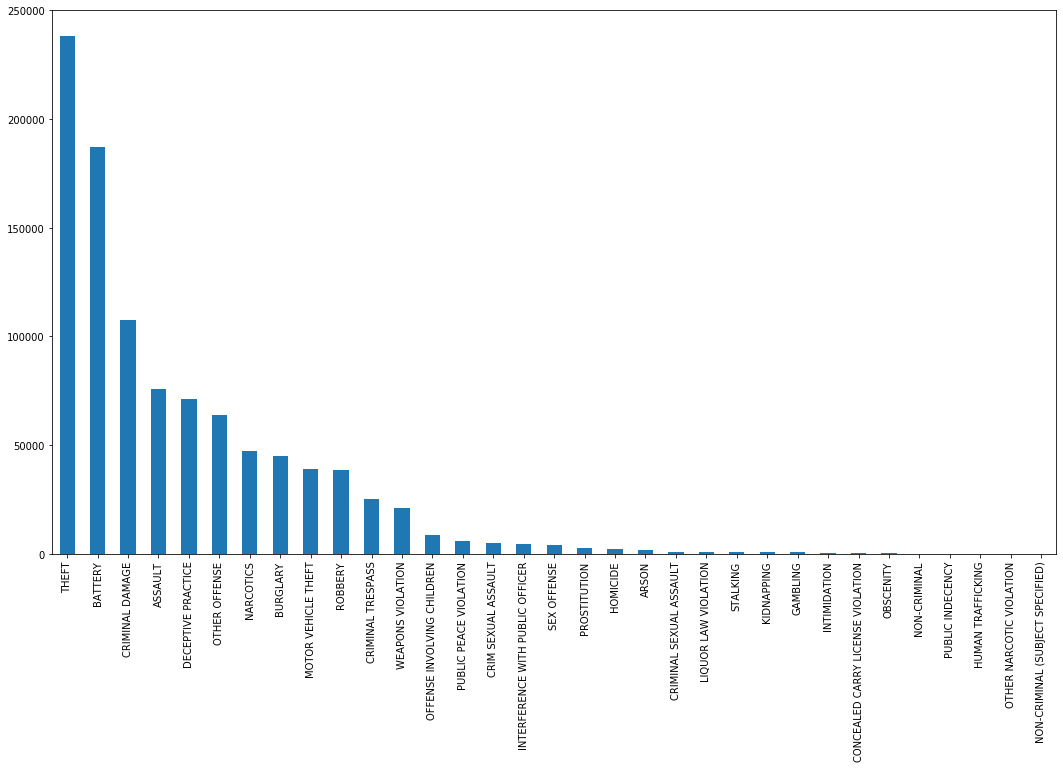

In [12]:
results_df.primary_type.value_counts().plot.bar(figsize=(18,10))

In [16]:
print(max(results_df.date))
print(min(results_df.date))

2020-06-12T23:40:00.000
2016-07-31T20:15:00.000


#### Chicago City Bound

In [17]:
xbound = (-87.9361,-87.5245)
ybound = (41.6447,42.023)

In [20]:
test_df = results_df
test_df = test_df[test_df.latitude.notna()].sort_values(['date'], ascending=[0])
test_df['date'] = pd.to_datetime(test_df['date'])
test_df['updated_on'] = pd.to_datetime(test_df['updated_on'])
test_df['latitude'] = pd.to_numeric(test_df['latitude'])
test_df['longitude'] = pd.to_numeric(test_df['longitude'])

df = test_df
df.columns

Index(['id', 'case_number', 'date', 'block', 'iucr', 'primary_type',
       'description', 'location_description', 'arrest', 'domestic', 'beat',
       'district', 'ward', 'community_area', 'fbi_code', 'x_coordinate',
       'y_coordinate', 'year', 'updated_on', 'latitude', 'longitude',
       'location'],
      dtype='object')

In [21]:
print(max(test_df['latitude']))
print(min(test_df['latitude']))
print(max(test_df['longitude']))
print(min(test_df['longitude']))

42.022671246
36.619446395
-87.524529378
-91.686565684


In [22]:
print(max(test_df['date']))
print(min(test_df['date']))

2020-06-12 23:40:00
2016-07-31 20:15:00


In [23]:
 df.columns

Index(['id', 'case_number', 'date', 'block', 'iucr', 'primary_type',
       'description', 'location_description', 'arrest', 'domestic', 'beat',
       'district', 'ward', 'community_area', 'fbi_code', 'x_coordinate',
       'y_coordinate', 'year', 'updated_on', 'latitude', 'longitude',
       'location'],
      dtype='object')

In [24]:
map_arr = []
interval_int = 30 #use 30 days data to predict next 7 days
series_range = 7 #days
time_interval = timedelta(days=interval_int)
date_start = min(df['date'])
date_end = max(df['date'])

geo_price_map = df[['date', 'primary_type','latitude', 'longitude']]

"""geo_price_map = df[['id', 'case_number', 'date', 'block', 'iucr', 'primary_type',
       'description', 'location_description', 'arrest', 'domestic', 'beat',
       'district', 'ward', 'community_area', 'fbi_code', 'x_coordinate',
       'y_coordinate', 'year', 'updated_on', 'latitude', 'longitude',
       'location']]"""

"geo_price_map = df[['id', 'case_number', 'date', 'block', 'iucr', 'primary_type',\n       'description', 'location_description', 'arrest', 'domestic', 'beat',\n       'district', 'ward', 'community_area', 'fbi_code', 'x_coordinate',\n       'y_coordinate', 'year', 'updated_on', 'latitude', 'longitude',\n       'location']]"

In [25]:
filter1a = pd.to_numeric(geo_price_map['longitude']) > xbound[0]
filter1b = pd.to_numeric(geo_price_map['longitude']) < xbound[1]
filter1c = pd.to_numeric(geo_price_map['latitude']) > ybound[0]
filter1d = pd.to_numeric(geo_price_map['latitude']) < ybound[1]
print("sum of remaining is: " + str(sum(filter1a&filter1b&filter1c&filter1d)))
geo_price_map = geo_price_map[filter1a&filter1b&filter1c&filter1d]

sum of remaining is: 987780


In [26]:
print(max(geo_price_map['latitude']))
print(min(geo_price_map['latitude']))
print(max(geo_price_map['longitude']))
print(min(geo_price_map['longitude']))

42.022671246
41.644818306
-87.524529378
-87.934567226


In [25]:
#crime_2020_gdf = geo_price_map[geo_price_map.date > pd.to_datetime("2020-01-01")]

#### Group data by the windowed interval of 30 days, slide forward in increment of 7 days and aggregate windows into list of dataframes

In [27]:
for int_cur_date in range(0, (date_end - date_start).days - interval_int, int(series_range)):
#for int_start_date in range(365, 565, interval_int):
    geo_price_map_filtered = geo_price_map[geo_price_map['longitude'].notnull()]
    
    #filter2 = geo_price_map_filtered['REQUEST_DATE'] > (date_start + timedelta(days=int_start_date))
    #filter3 = geo_price_map_filtered['REQUEST_DATE'] <= (date_start + timedelta(days=int_start_date+interval_int))
    
    filter2 = geo_price_map_filtered['date'] > (date_end - timedelta(days=int_cur_date+interval_int))
    filter3 = geo_price_map_filtered['date'] <= (date_end -  timedelta(days=int_cur_date))
    
    print(date_end - timedelta(days=int_cur_date+interval_int))
    print(date_end -  timedelta(days=int_cur_date))
    
    
    geo_price_map_filtered = geo_price_map_filtered.where(filter2 & filter3)
    print("crime count: " + str(geo_price_map_filtered.notnull().sum()))
    
    print("_"*20)
    map_arr.append(geo_price_map_filtered)

2020-05-13 23:40:00
2020-06-12 23:40:00
crime count: date            17034
primary_type    17034
latitude        17034
longitude       17034
dtype: int64
____________________
2020-05-06 23:40:00
2020-06-05 23:40:00
crime count: date            16743
primary_type    16743
latitude        16743
longitude       16743
dtype: int64
____________________
2020-04-29 23:40:00
2020-05-29 23:40:00
crime count: date            14467
primary_type    14467
latitude        14467
longitude       14467
dtype: int64
____________________
2020-04-22 23:40:00
2020-05-22 23:40:00
crime count: date            13500
primary_type    13500
latitude        13500
longitude       13500
dtype: int64
____________________
2020-04-15 23:40:00
2020-05-15 23:40:00
crime count: date            12984
primary_type    12984
latitude        12984
longitude       12984
dtype: int64
____________________
2020-04-08 23:40:00
2020-05-08 23:40:00
crime count: date            12488
primary_type    12488
latitude        12488
longit

crime count: date            23878
primary_type    23878
latitude        23878
longitude       23878
dtype: int64
____________________
2019-06-12 23:40:00
2019-07-12 23:40:00
crime count: date            23601
primary_type    23601
latitude        23601
longitude       23601
dtype: int64
____________________
2019-06-05 23:40:00
2019-07-05 23:40:00
crime count: date            23575
primary_type    23575
latitude        23575
longitude       23575
dtype: int64
____________________
2019-05-29 23:40:00
2019-06-28 23:40:00
crime count: date            23225
primary_type    23225
latitude        23225
longitude       23225
dtype: int64
____________________
2019-05-22 23:40:00
2019-06-21 23:40:00
crime count: date            23181
primary_type    23181
latitude        23181
longitude       23181
dtype: int64
____________________
2019-05-15 23:40:00
2019-06-14 23:40:00
crime count: date            23228
primary_type    23228
latitude        23228
longitude       23228
dtype: int64
___________

crime count: date            24081
primary_type    24081
latitude        24081
longitude       24081
dtype: int64
____________________
2018-07-18 23:40:00
2018-08-17 23:40:00
crime count: date            24221
primary_type    24221
latitude        24221
longitude       24221
dtype: int64
____________________
2018-07-11 23:40:00
2018-08-10 23:40:00
crime count: date            24026
primary_type    24026
latitude        24026
longitude       24026
dtype: int64
____________________
2018-07-04 23:40:00
2018-08-03 23:40:00
crime count: date            23998
primary_type    23998
latitude        23998
longitude       23998
dtype: int64
____________________
2018-06-27 23:40:00
2018-07-27 23:40:00
crime count: date            24089
primary_type    24089
latitude        24089
longitude       24089
dtype: int64
____________________
2018-06-20 23:40:00
2018-07-20 23:40:00
crime count: date            24047
primary_type    24047
latitude        24047
longitude       24047
dtype: int64
___________

crime count: date            22522
primary_type    22522
latitude        22522
longitude       22522
dtype: int64
____________________
2017-08-23 23:40:00
2017-09-22 23:40:00
crime count: date            22378
primary_type    22378
latitude        22378
longitude       22378
dtype: int64
____________________
2017-08-16 23:40:00
2017-09-15 23:40:00
crime count: date            22397
primary_type    22397
latitude        22397
longitude       22397
dtype: int64
____________________
2017-08-09 23:40:00
2017-09-08 23:40:00
crime count: date            22766
primary_type    22766
latitude        22766
longitude       22766
dtype: int64
____________________
2017-08-02 23:40:00
2017-09-01 23:40:00
crime count: date            23602
primary_type    23602
latitude        23602
longitude       23602
dtype: int64
____________________
2017-07-26 23:40:00
2017-08-25 23:40:00
crime count: date            24020
primary_type    24020
latitude        24020
longitude       24020
dtype: int64
___________

crime count: date            22879
primary_type    22879
latitude        22879
longitude       22879
dtype: int64
____________________
2016-09-28 23:40:00
2016-10-28 23:40:00
crime count: date            22542
primary_type    22542
latitude        22542
longitude       22542
dtype: int64
____________________
2016-09-21 23:40:00
2016-10-21 23:40:00
crime count: date            22698
primary_type    22698
latitude        22698
longitude       22698
dtype: int64
____________________
2016-09-14 23:40:00
2016-10-14 23:40:00
crime count: date            22782
primary_type    22782
latitude        22782
longitude       22782
dtype: int64
____________________
2016-09-07 23:40:00
2016-10-07 23:40:00
crime count: date            23244
primary_type    23244
latitude        23244
longitude       23244
dtype: int64
____________________
2016-08-31 23:40:00
2016-09-30 23:40:00
crime count: date            23475
primary_type    23475
latitude        23475
longitude       23475
dtype: int64
___________

#### Reverse list to be earliest data first in the list

In [28]:
map_arr.reverse()

In [29]:
xbound = (-87.9361,-87.5245)
ybound = (41.6447,42.023)

In [30]:
#print last slide of the time aggregated list of dataframe
map_arr[-1][map_arr[-1]['date'].notnull()]

,date,primary_type,latitude,longitude
0,2020-06-12 23:40:00,CRIMINAL DAMAGE,41.914011,-87.764391
1,2020-06-12 23:24:00,PUBLIC PEACE VIOLATION,41.844415,-87.658210
2,2020-06-12 23:17:00,MOTOR VEHICLE THEFT,41.896602,-87.633830
3,2020-06-12 23:15:00,BATTERY,41.896602,-87.633830
5,2020-06-12 23:05:00,CRIMINAL DAMAGE,41.720889,-87.629878
...,...,...,...,...
17387,2020-05-13 23:53:00,BATTERY,41.662583,-87.636606
17388,2020-05-13 23:52:00,WEAPONS VIOLATION,41.851851,-87.699432
17389,2020-05-13 23:51:00,DECEPTIVE PRACTICE,41.725828,-87.656705
17390,2020-05-13 23:50:00,MOTOR VEHICLE THEFT,41.794327,-87.624609


(-87.85041986215067, -87.52523350043245)
(41.65924455069546, 42.019245840973895)


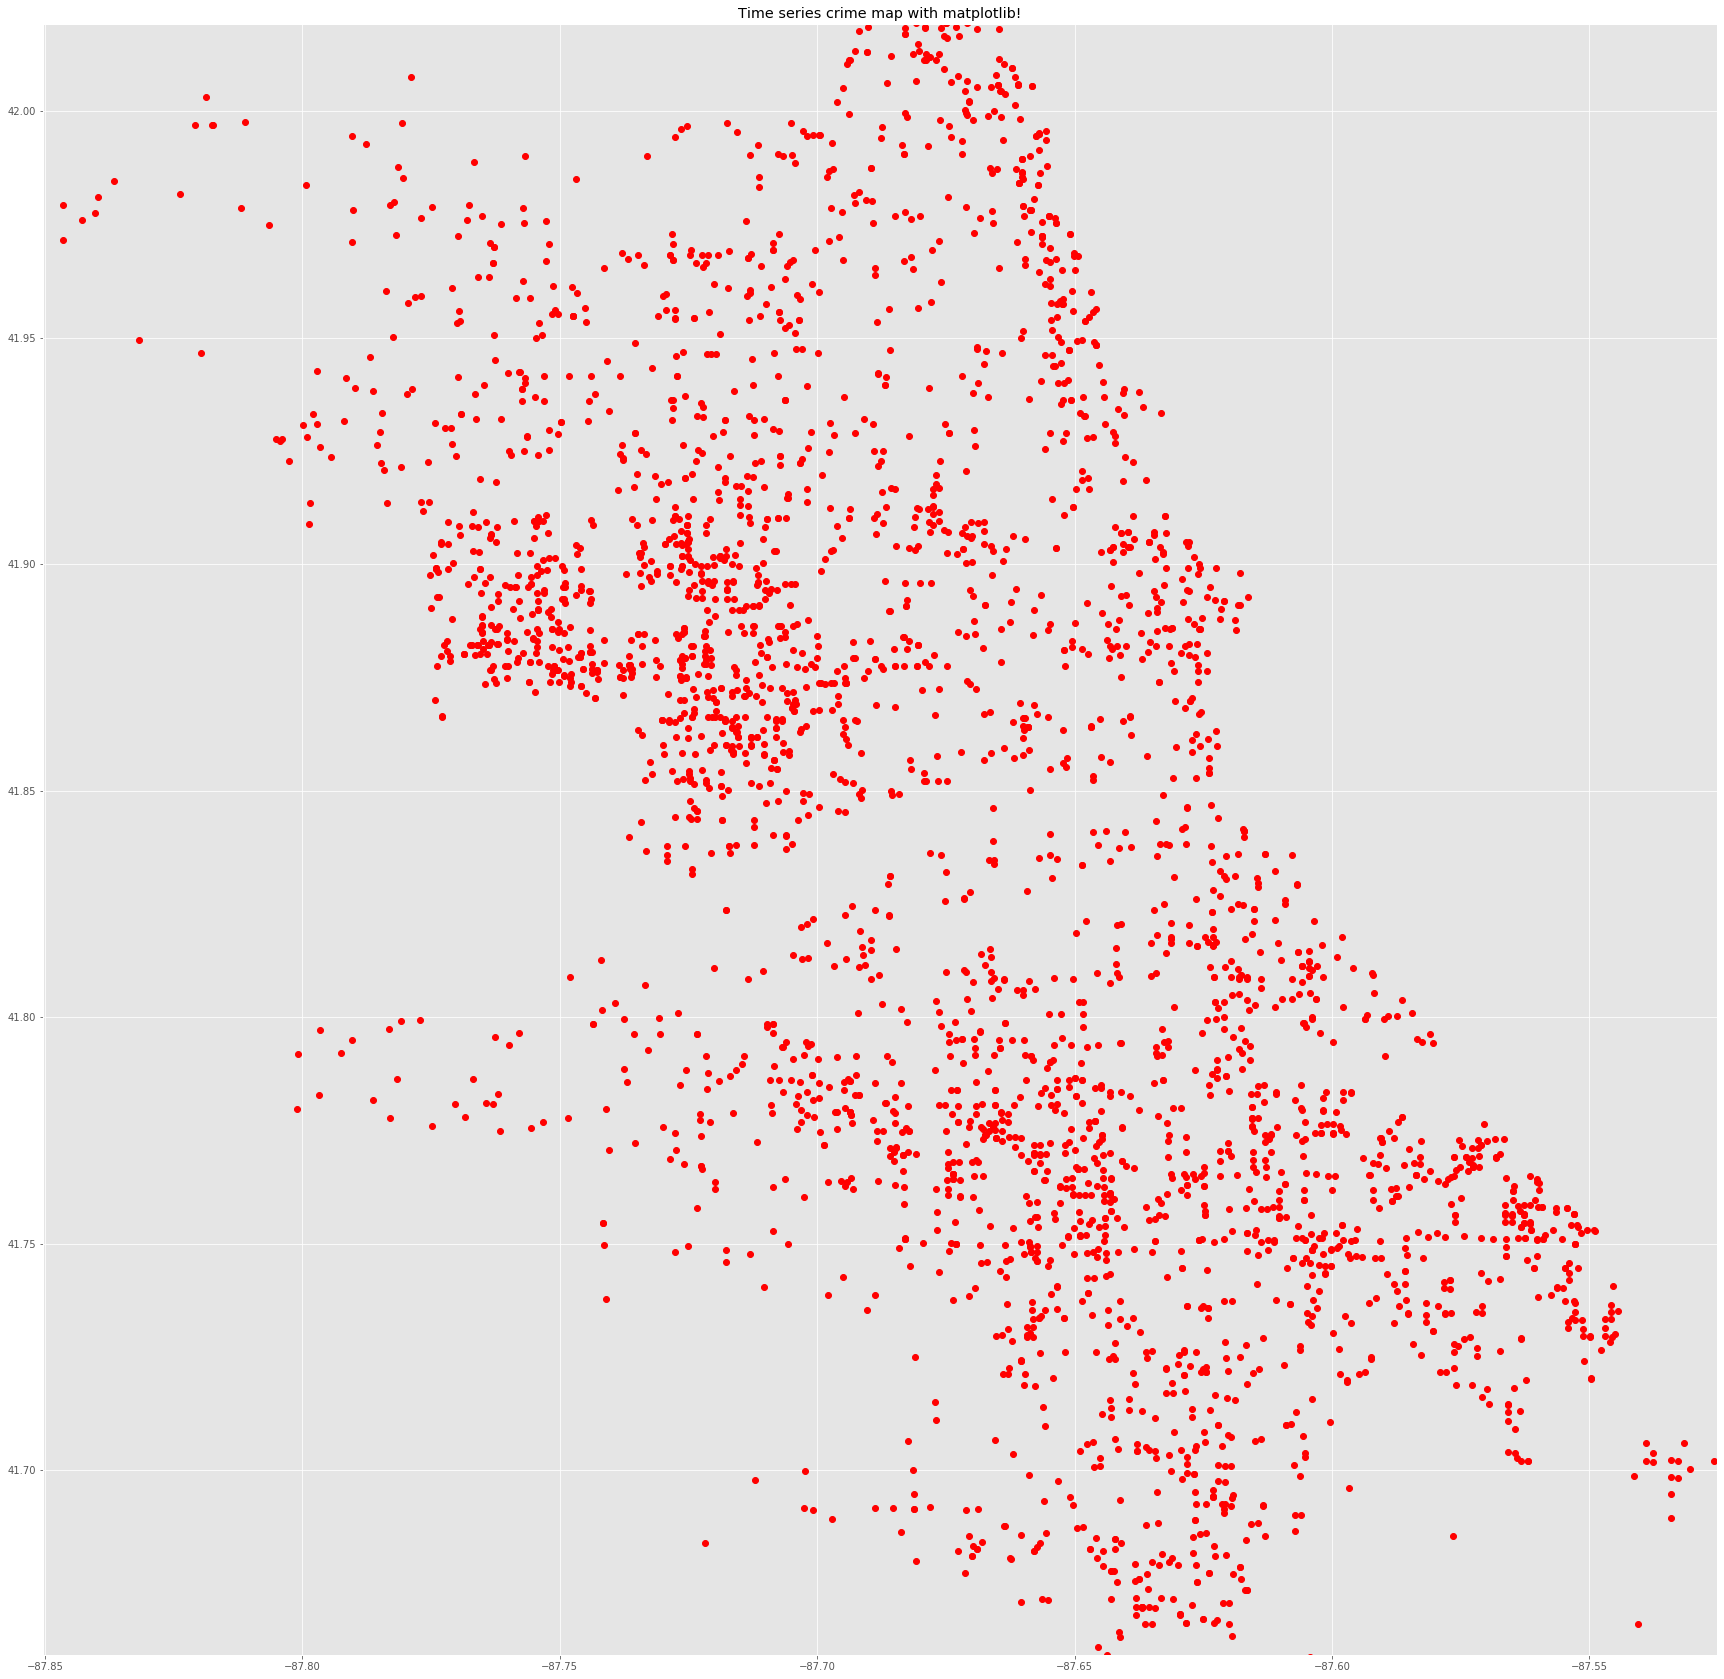

In [24]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
import matplotlib.animation as animation 
import numpy as np 
plt.style.use('ggplot')
mpl.rcParams['agg.path.chunksize'] = 10000
plt.rcParams["figure.figsize"] = [30, 30]

df = map_arr[-1]
xdata = df["longitude"].dropna().to_numpy()
ydata = df["latitude"].dropna().to_numpy()
xlim=(min(xdata), max(xdata)) 
ylim=(min(ydata), max(ydata))


xlim = (-87.85041986215067, -87.52523350043245)
ylim = (41.65924455069546, 42.019245840973895)

print(xlim)
print(ylim)

fig = plt.figure()
#plt.scatter(xdata,ydata)
ax = plt.axes(xlim=xlim, ylim=ylim) 
#ax.set_facecolor((1.0, 0.47, 0.42))
sct, = plt.plot([], [],'o', color='red', lw=2) 

# initialization function 
def init(): 
    # creating an empty plot/frame 
    sct.set_data([], [])
    return sct,

# lists to store x and y axis points 
xdata, ydata = [], [] 

# animation function 
def animate(i):
    df = map_arr[i]
    xdata = df["longitude"].dropna().to_numpy()
    ydata = df["latitude"].dropna().to_numpy()
    sct.set_data(xdata,ydata)
    return sct,

# setting a title for the plot 
plt.title('Time series crime map with matplotlib!') 
# hiding the axis details 
plt.axis('on') 

# call the animator	 
anim = animation.FuncAnimation(fig, animate, init_func=init,frames=np.arange(0,len(map_arr),1), interval=100, blit=True,repeat=False) 

# save the animation as mp4 video file 
anim.save(CSV_PATH + 'crime_locations_2016-2020.gif', writer='imagemagick') 

#### Covert points into geojson and geopandas compatible geometery

In [31]:
latest_30_df = map_arr[-1][map_arr[-1]['date'].notnull()]
latest_30_df.head()

,date,primary_type,latitude,longitude
0,2020-06-12 23:40:00,CRIMINAL DAMAGE,41.914011,-87.764391
1,2020-06-12 23:24:00,PUBLIC PEACE VIOLATION,41.844415,-87.658210
2,2020-06-12 23:17:00,MOTOR VEHICLE THEFT,41.896602,-87.633830
3,2020-06-12 23:15:00,BATTERY,41.896602,-87.633830
5,2020-06-12 23:05:00,CRIMINAL DAMAGE,41.720889,-87.629878


In [32]:
from scipy import stats as st
from scipy.stats import gaussian_kde as gaussian_kde
import numpy as np
from KDEpy import FFTKDE, NaiveKDE


def get_kde( x, y, xmin, xmax, ymin, ymax, xx, yy, positions):

    values = np.array([x, y]).T
    #values = values.reshape(values.shape[1], values.shape[0])
    #print("values is: " + str(values))
    #grid, points = get_kernel(values)
    points = get_kernel(values, positions)
    #kernel.set_bandwidth(bw_method=kernel.factor / 30.)
    f = np.reshape(points, xx.shape)
    #print(points.shape)
    #print(grid)
    #return grid, f
    return f

def get_kernel(data, positions):
    #print(data.shape)
    #print(data)
    estimator = FFTKDE(kernel='gaussian', norm=2, bw=0.001)
    #grid, points = estimator.fit(data, weights=None).evaluate(grid_size)
    points = estimator.fit(data, weights=None).evaluate(positions)
    #grid, points = estimator.fit(data, weights=None).evaluate(grid_size)
    #kernel = gaussian_kde(dataset=values, bw_method="silverman" )
    #return grid, points
    return points

In [33]:
xbound = (-87.9361,-87.5245)
ybound = (41.6447,42.023)

In [40]:
grid_size = 100
density_matrix_t_series = []
# Define the borders
x = [-87.9361,-87.5245]
y = [41.6447,42.023]
deltaX = (max(x) - min(x))/10
deltaY = (max(y) - min(y))/10
xmin = min(x) - deltaX
xmax = max(x) + deltaX
ymin = min(y) - deltaY
ymax = max(y) + deltaY

xx, yy = np.mgrid[xmin:xmax:(grid_size*1j), ymin:ymax:(grid_size*1j)]
positions = np.dstack([xx.ravel(), yy.ravel()])
positions = positions.reshape(positions.shape[1], positions.shape[2])
grid_matrix = positions

In [41]:
for i, df in enumerate(map_arr):
    if df["longitude"].count() > 400:
        #grid, points = get_kde(df["LONGITUDE"].dropna().to_numpy(), df["LATITUDE"].dropna().to_numpy() , xmin, xmax, ymin, ymax, xx, yy, positions)
        points = get_kde(df["longitude"].dropna().to_numpy(), df["latitude"].dropna().to_numpy() , xmin, xmax, ymin, ymax, xx, yy, positions)
        density_matrix_t_series.append(points)
        print("@" + str(i))

@0
@1
@2
@3
@4
@5
@6
@7
@8
@9
@10
@11
@12
@13
@14
@15
@16
@17
@18
@19
@20
@21
@22
@23
@24
@25
@26
@27
@28
@29
@30
@31
@32
@33
@34
@35
@36
@37
@38
@39
@40
@41
@42
@43
@44
@45
@46
@47
@48
@49
@50
@51
@52
@53
@54
@55
@56
@57
@58
@59
@60
@61
@62
@63
@64
@65
@66
@67
@68
@69
@70
@71
@72
@73
@74
@75
@76
@77
@78
@79
@80
@81
@82
@83
@84
@85
@86
@87
@88
@89
@90
@91
@92
@93
@94
@95
@96
@97
@98
@99
@100
@101
@102
@103
@104
@105
@106
@107
@108
@109
@110
@111
@112
@113
@114
@115
@116
@117
@118
@119
@120
@121
@122
@123
@124
@125
@126
@127
@128
@129
@130
@131
@132
@133
@134
@135
@136
@137
@138
@139
@140
@141
@142
@143
@144
@145
@146
@147
@148
@149
@150
@151
@152
@153
@154
@155
@156
@157
@158
@159
@160
@161
@162
@163
@164
@165
@166
@167
@168
@169
@170
@171
@172
@173
@174
@175
@176
@177
@178
@179
@180
@181
@182
@183
@184
@185
@186
@187
@188
@189
@190
@191
@192
@193
@194
@195
@196
@197


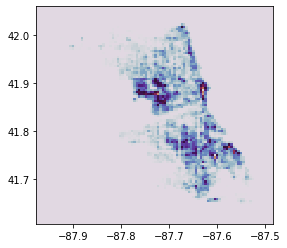

In [42]:
plt.imshow( X=np.rot90(density_matrix_t_series[-1]), cmap=plt.cm.twilight, extent=[xmin, xmax, ymin, ymax])

In [43]:
density_matrix_t_series[0].shape

(100, 100)

In [ ]:
#This shape is for LSTM model input
#normalized_matrices.shape

In [44]:
density_matrix_t_series = np.rollaxis(np.dstack(density_matrix_t_series),-1)
density_matrix_t_series.shape

(198, 100, 100)

In [45]:
data2 = density_matrix_t_series
data2.shape

(198, 100, 100)

In [ ]:
#data2 = normalized_matrices.reshape((int(normalized_matrices.shape[0]/normalized_matrices.shape[1]), normalized_matrices.shape[1], normalized_matrices.shape[1]))
#data2.shape

In [ ]:
iterable = [np.rot90(matrix) for matrix in data2]

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
import matplotlib.animation as animation 
import numpy as np 
plt.style.use('ggplot')
mpl.rcParams['agg.path.chunksize'] = 10000

df = map_arr[-1]
xdata = df["longitude"].dropna().to_numpy()
ydata = df["latitude"].dropna().to_numpy()
xlim=(min(xdata), max(xdata)) 
ylim=(min(ydata), max(ydata))

print(xlim)
print(ylim)

plt.rcParams["figure.figsize"] = [30, 30]
fig1, ax1 = plt.subplots()
#ax1.scatter(x="LONGITUDE", y="LATITUDE", data=map_arr[frame_from_latest], c="red", alpha=0.4)
im = plt.imshow( X=iterable[0], cmap=plt.cm.twilight, extent=[xmin, xmax, ymin, ymax])


# initialization function 
def init(): 
    # creating an empty plot/frame
    # print("in init")
    im.set_data(iterable[0])
    return [im]


# animation function 
def animate(i):
    #df = map_arr[i]
    #xdata = df["LONGITUDE"].dropna().to_numpy()
    #ydata = df["LATITUDE"].dropna().to_numpy()
    #np.rot90(data2[i])
    #print("in animate")
    im.set_data(iterable[i])
    return [im]

# setting a title for the plot 
plt.title('Time series crime map with matplotlib!') 
# hiding the axis details 
plt.axis('on') 

# call the animator	 
anim = animation.FuncAnimation(fig1, animate, init_func=init,frames=np.arange(0,np.rot90(data2).shape[1],1), interval=100, blit=True,repeat=False) 

# save the animation as mp4 video file 
anim.save(CSV_PATH + 'crime_zone.gif', writer='imagemagick') 
plt.show()

(-87.925269164, -87.524618154)
(41.651223603000005, 42.022534793)


In [46]:
import pickle
pickle.dump( density_matrix_t_series, open( CSV_PATH + "density_matrix_t_series_100x100.pickle", "wb" ) )